<a href="https://colab.research.google.com/github/Txlu-OG/Learn/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/My Drive/Mall_Customers.csv')  # Edit path if needed
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
 6   AggCluster              200 non-null    int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 10.3+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  200.000000  200.000000          200.000000              200.000000   
mean   100.500000   38.850000           60.560000               50.200000   
std     57.879185   13.969007           26.264721               25.823522   
min      1.000000   18.000000           15.000000     

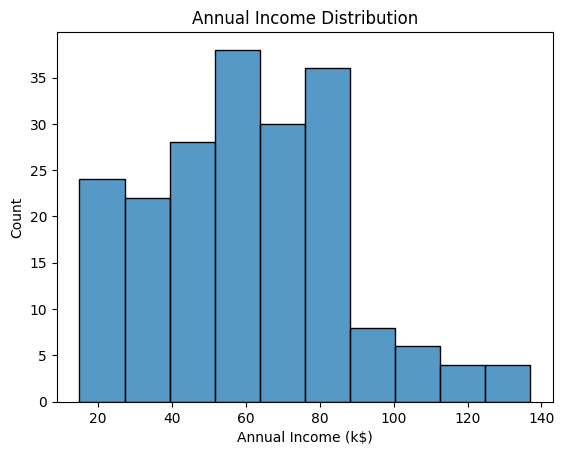

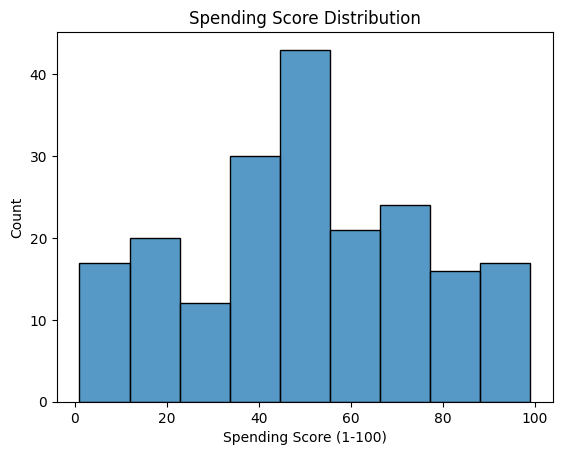

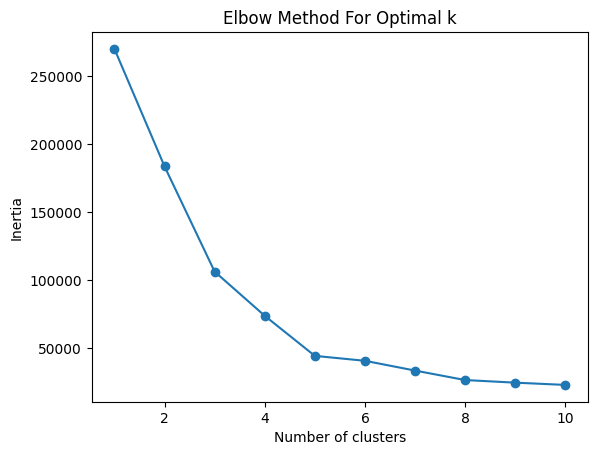

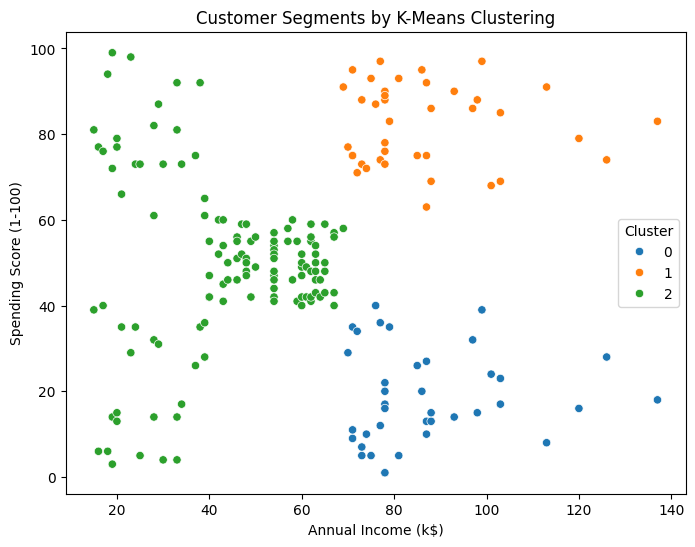

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 87.000000               18.631579
1                 86.538462               82.128205
2                 44.154472               49.829268


In [6]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

sns.histplot(df['Annual Income (k$)'])
plt.title('Annual Income Distribution')
plt.show()

sns.histplot(df['Spending Score (1-100)'])
plt.title('Spending Score Distribution')
plt.show()

df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})  # Encode Gender
X = df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']]

# Find optimal number of clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the plot, select k
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
df['Cluster'] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='tab10')
plt.title('Customer Segments by K-Means Clustering')
plt.show()

cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X)
df['AggCluster'] = agg_labels
